In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Edyoda\ML Rishi Bansal\Assignments\Assignment 2\Obesity Data assignment 2 - 3\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [106]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [107]:
df.shape #we have 33 features and 53000 rows

(53392, 33)

In [108]:
(df.isnull().sum()/len(df))*100

YearStart                       0.000000
YearEnd                         0.000000
LocationAbbr                    0.000000
LocationDesc                    0.000000
Datasource                      0.000000
Class                           0.000000
Topic                           0.000000
Question                        0.000000
Data_Value_Unit               100.000000
Data_Value_Type                 0.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
ClassID         

In [109]:
#Since a lot of columns have over 70% missing data, we shall drop these columns!
new_df = df.drop(['Data_Value_Unit','Data_Value_Footnote_Symbol','Data_Value_Footnote','Total','Age(years)','Education','Gender','Income','Race/Ethnicity'], axis = 1)


In [110]:
new_df.isnull().sum()*100/len(new_df)

YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
Datasource                   0.000000
Class                        0.000000
Topic                        0.000000
Question                     0.000000
Data_Value_Type              0.000000
Data_Value                   9.450854
Data_Value_Alt               9.450854
Low_Confidence_Limit         9.450854
High_Confidence_Limit        9.450854
Sample_Size                  9.450854
GeoLocation                  1.887923
ClassID                      0.000000
TopicID                      0.000000
QuestionID                   0.000000
DataValueTypeID              0.000000
LocationID                   0.000000
StratificationCategory1      0.000000
Stratification1              0.000000
StratificationCategoryId1    0.000000
StratificationID1            0.000000
dtype: float64

In [111]:
#since all these columns have the exact same missing value percentage, it could be that they all have the same rows with mising values
#so lets drop these rows
new_df.dropna(inplace = True)

In [112]:
new_df.isnull().sum()*100/len(new_df)

YearStart                    0.0
YearEnd                      0.0
LocationAbbr                 0.0
LocationDesc                 0.0
Datasource                   0.0
Class                        0.0
Topic                        0.0
Question                     0.0
Data_Value_Type              0.0
Data_Value                   0.0
Data_Value_Alt               0.0
Low_Confidence_Limit         0.0
High_Confidence_Limit        0.0
Sample_Size                  0.0
GeoLocation                  0.0
ClassID                      0.0
TopicID                      0.0
QuestionID                   0.0
DataValueTypeID              0.0
LocationID                   0.0
StratificationCategory1      0.0
Stratification1              0.0
StratificationCategoryId1    0.0
StratificationID1            0.0
dtype: float64

In [113]:
#Yup now we have a dataset with no missing values
#beware, we just dropped all rows and columns with missing values, this may not have been the best approach.

In [114]:
#now lets see the data types!
#lets see if there are rows where yearstart is not equal to year end
new_df[new_df['YearStart']!=new_df['YearEnd']]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [115]:
#Hence we can drop one of those cols, location descr is also just the full name of the location, so we can drop that
#and data source is the same for all rows, so we can drop that too
new_df.drop(['YearEnd','LocationAbbr','Datasource'],axis = 1, inplace = True)

In [116]:
#it seems data_value and data_value_alt have similar values, lets see if any rows have different value

new_df[new_df['Data_Value']!=new_df['Data_Value_Alt']]

,YearStart,LocationDesc,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [117]:
#Yes, none of the rows have different values for Data_Value_Alt and Data_Value, so we can drop one
#also, Data_Value and their low confidence and high confidence level will be very highly correlated
#lets just check once

corr = new_df.corr()

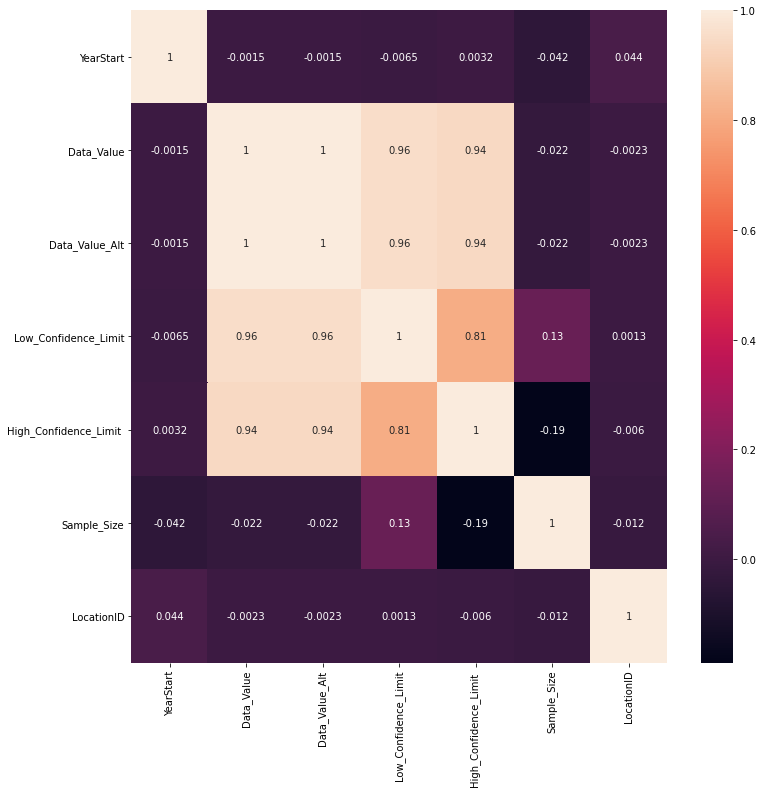

In [118]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True)
plt.show()

In [119]:
#so we can go ahead and drop, Data_Value_Alt, low and high limits too!
new_df.drop(['Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit '], axis = 1, inplace = True)

In [120]:
new_df.shape

(47338, 18)

In [121]:
new_df.head()

,YearStart,LocationDesc,Class,Topic,Question,Data_Value_Type,Data_Value,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [122]:
new_df.Data_Value_Type.unique()

array(['Value'], dtype=object)

In [123]:
new_df.DataValueTypeID.unique()

array(['VALUE'], dtype=object)

In [124]:
new_df.Class.unique()

array(['Obesity / Weight Status', 'Fruits and Vegetables',
       'Physical Activity'], dtype=object)

In [125]:
new_df.ClassID.unique()

array(['OWS', 'FV', 'PA'], dtype=object)

In [126]:
new_df.TopicID.unique()

array(['OWS1', 'FV1', 'PA1'], dtype=object)

In [127]:
new_df.Topic.unique()

array(['Obesity / Weight Status', 'Fruits and Vegetables - Behavior',
       'Physical Activity - Behavior'], dtype=object)

In [128]:
#we can remove the following columns, col Class (as class and topic have same values)
#cols classId and topic ID as they all convey the same info as col topic
#cols Data_Value_Type and DataValueTypeID as they are not giving any information
#cols StratificationCategory1	Stratification1 as they are represented in the dataset by the ID columns succeeding these 2 cols
new_df.drop(['Data_Value_Type','ClassID','TopicID','DataValueTypeID','Class','StratificationCategory1','Stratification1'], axis = 1, inplace = True)

In [129]:
new_df.head()

,YearStart,LocationDesc,Topic,Question,Data_Value,Sample_Size,GeoLocation,QuestionID,LocationID,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,1,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",Q036,1,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",Q036,1,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",Q036,1,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",Q036,1,EDU,EDUHSGRAD


In [130]:
len(new_df.LocationID.unique())

54

In [131]:
len(new_df.LocationAbbr.unique())

AttributeError: 'DataFrame' object has no attribute 'LocationAbbr'

In [132]:
new_df.drop(['QuestionID','LocationID'], axis = 1, inplace = True)

In [133]:
new_df.head()

,YearStart,LocationDesc,Topic,Question,Data_Value,Sample_Size,GeoLocation,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",EDU,EDUHSGRAD


In [139]:
new_df.StratificationCategoryId1.value_counts()

INC      13097
AGEYR    11222
RACE      9922
EDU       7484
GEN       3742
OVR       1871
Name: StratificationCategoryId1, dtype: int64

In [134]:
#Lets try to answer the questions by state!
#first lets see the different questions!

new_df.Question.unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [143]:
obesity_df = new_df[new_df.Question == 'Percent of adults aged 18 years and older who have obesity']

In [152]:
obesity_df = obesity_df.groupby(by = 'LocationDesc').mean()
obesity_df = obesity_df.sort_values(by = 'Data_Value', ascending = False)
obesity_df.head()

,YearStart,Data_Value,Sample_Size
LocationDesc,,,
West Virginia,2013.468085,35.178723,1427.964539
Mississippi,2013.474453,35.110219,1631.751825
Arkansas,2013.500000,34.558000,1156.526667
Louisiana,2013.473333,34.393333,1579.386667
Alabama,2013.493333,33.636667,1765.386667


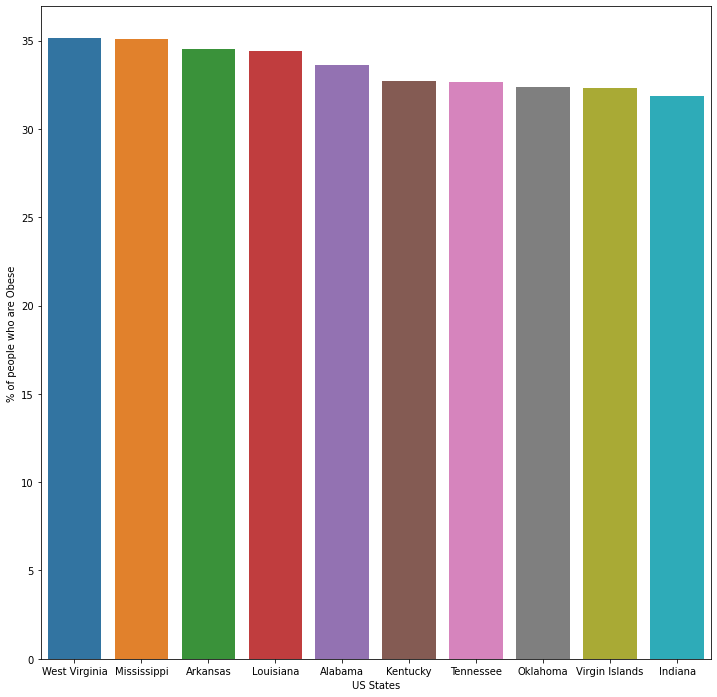

In [158]:
plt.figure(figsize = (12,12))
sns.barplot(x = obesity_df.head(10).index, y = obesity_df.head(10).Data_Value)
plt.xlabel('US States')
plt.ylabel('% of people who are Obese')
plt.show()